## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


# Tasks

## 1. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Tuwaiq/Task (2) Dataset.csv')
df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246


In [14]:
df.columns

Index(['City', 'Datetime', 'TrafficIndexLive', 'JamsCount', 'JamsDelay',
       'JamsLength', 'TrafficIndexWeekAgo', 'TravelTimeHistoric',
       'TravelTimeLive', 'Time'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 66639 non-null  object 
 1   Datetime             66639 non-null  object 
 2   TrafficIndexLive     66639 non-null  int64  
 3   JamsCount            66639 non-null  int64  
 4   JamsDelay            66639 non-null  float64
 5   JamsLength           66639 non-null  float64
 6   TrafficIndexWeekAgo  66639 non-null  int64  
 7   TravelTimeHistoric   62772 non-null  float64
 8   TravelTimeLive       62772 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 4.6+ MB


In [8]:
df['Time'] = pd.to_datetime(df['Datetime'])

### Identify and analyze patterns in the data.

In [7]:
df['City'].unique()

array(['Abudhabi', 'Al-ain', 'Cairo', 'Dammam', 'Doha', 'Dubai', 'Jeddah',
       'Kuwait', 'Mecca', 'Medina', 'Riyadh'], dtype=object)

In [10]:
grouped = df.groupby('City')['JamsCount'].mean()
grouped = pd.DataFrame(grouped)
grouped

,JamsCount
City,
Abudhabi,29.870859
Al-ain,6.837733
Cairo,65.302186
Dammam,33.675983
Doha,41.909457
Dubai,185.216341
Jeddah,48.843944
Kuwait,68.176619
Mecca,11.925207


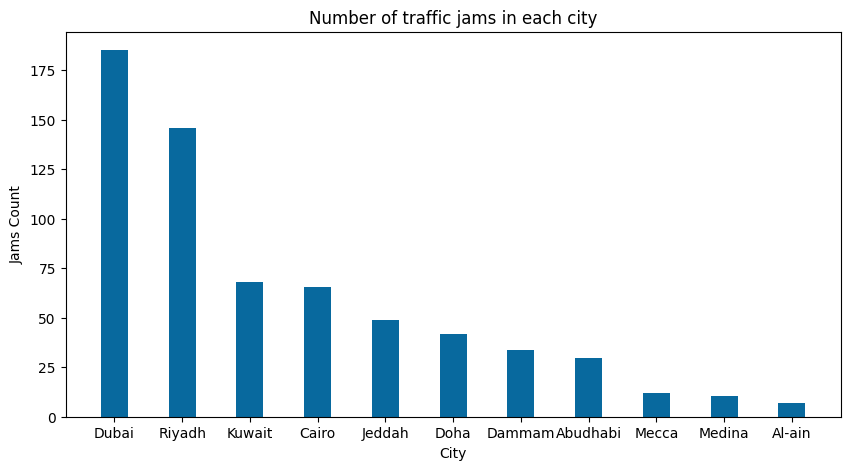

In [13]:
grouped = grouped.sort_values(by = 'JamsCount', ascending = False)

fig = plt.figure(figsize = (10, 5))

plt.bar(grouped.index, grouped['JamsCount'], color ='#08699E',
        width = 0.4)
plt.xlabel("City")
plt.ylabel("Jams Count")
plt.title("Number of traffic jams in each city")
plt.show()

### Visualize the distribution of key variables (e.g., Traffic_Index, Date).

### Explore relationships between variables (e.g., Traffic_Index vs. Weather_Condition).


## figure 1

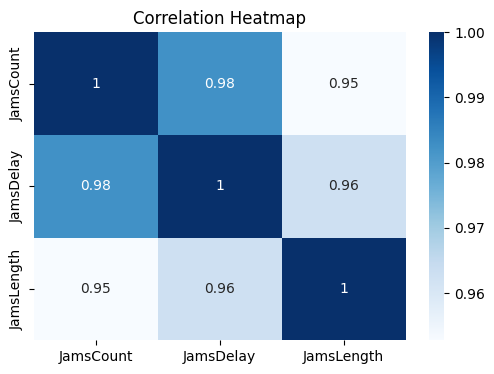

In [15]:
correlations_columns= df[['JamsCount' , 'JamsDelay' , 'JamsLength']]

corr_tabel = correlations_columns.corr()
corr_tabel

plt.figure(figsize=(6, 4))
sns.heatmap(corr_tabel, annot=True , cmap="Blues")
plt.title('Correlation Heatmap')
plt.show()

# The HeatMap showed that there is a strong relationship between the number of traffic jams and the total delay caused by traffic jams,
#  when there is a traffic jam it will often result in a delay

## 2. Data Visualization

* Ensure the visualizations are clear and informative.

## figure 2

In [20]:
df['hour'] = df['Time'].dt.hour

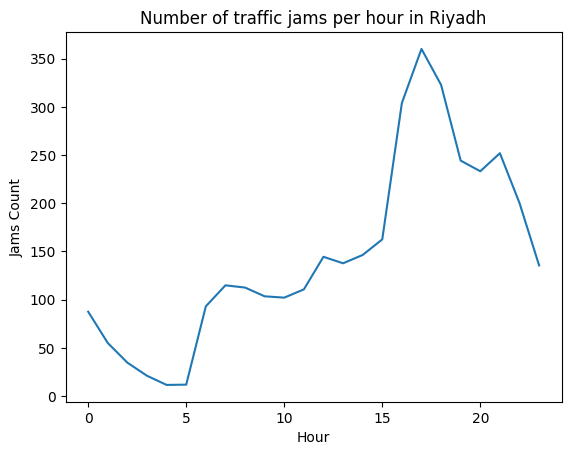

In [23]:
# The busiest hours in Riyadh
filtered = df[df['City'] == 'Riyadh']
grouped2 = filtered.groupby('hour')['JamsCount'].mean()
grouped2 = pd.DataFrame(grouped2)
grouped2

plt.plot(grouped2.index, grouped2['JamsCount'])
plt.xlabel("Hour")
plt.ylabel("Jams Count")
plt.title("Number of traffic jams per hour in Riyadh")

plt.show()

# we want to know the hours when the number of traffic jams is highest in Riyadh.
#  The figures showed that the time when there is the most traffic jam is approximately between 15:00 and 17:00.

### Create visualizations to illustrate the findings from the EDA.


### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

## 3. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

figure 1- The HeatMap showed that there is a strong relationship between the number of traffic jams and the total delay caused by traffic jams, when there is a traffic jam it will often result in a delay

figure 2 - In the second figure, we want to know the hours when the number of traffic jams is highest in Riyadh. The figures showed that the time when there is the most traffic jam is approximately between 15:00 and 17:00.